In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# Netflix Catalogue EDA

During this exploratory data analysis I delve into the netflix catalogue dataset of released TV shows and Films

### Import Libraries

In [14]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140


In [15]:
netflix_titles = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [16]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [18]:
netflix_titles.count()


show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [19]:
netflix_movies=netflix_titles[netflix_titles['type']=='Movie']
netflix_shows=netflix_titles[netflix_titles['type']=='TV Show']

In [20]:
netflix_movies.count()

show_id         6131
type            6131
title           6131
director        5943
cast            5656
country         5691
date_added      6131
release_year    6131
rating          6129
duration        6128
listed_in       6131
description     6131
dtype: int64

In [21]:
netflix_shows.count()

show_id         2676
type            2676
title           2676
director         230
cast            2326
country         2285
date_added      2666
release_year    2676
rating          2674
duration        2676
listed_in       2676
description     2676
dtype: int64

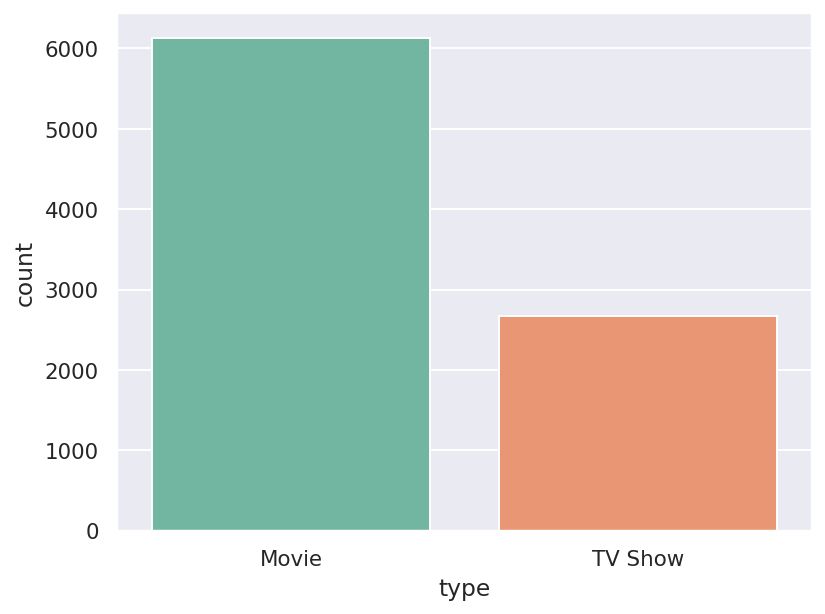

In [22]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_titles, palette="Set2")

In [23]:
netflix_shows_date = netflix_shows[['date_added']].dropna()
netflix_shows_date['year'] = netflix_shows_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_shows_date['month'] = netflix_shows_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])


In [24]:
netflix_shows_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


<Axes: title={'center': 'Shows Added Per Year'}, xlabel='year'>

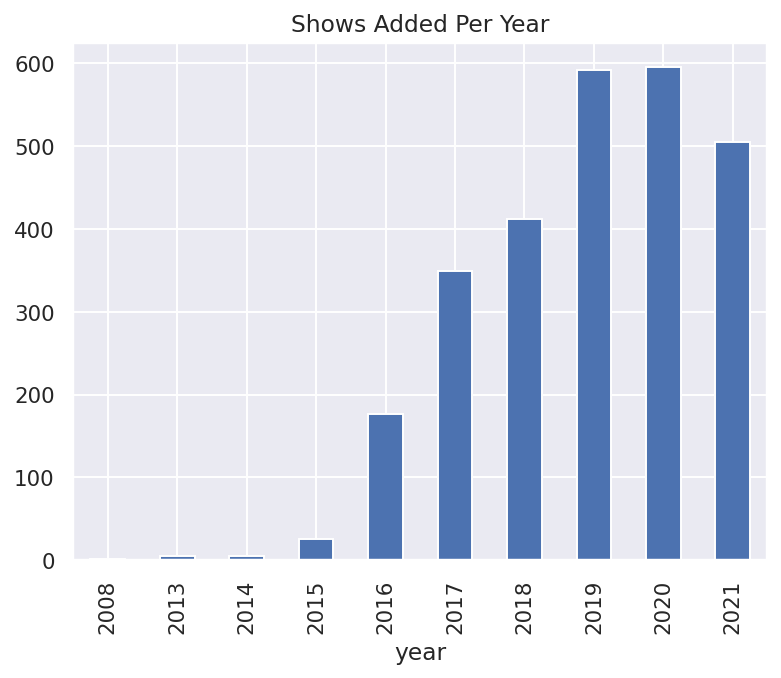

In [25]:
netflix_shows_date['year'].value_counts().sort_index().plot(kind='bar', title='Shows Added Per Year')


Here we can see TV shows first becoming prominent in 2016 and peaking in releases in 2020 before gradually declining.

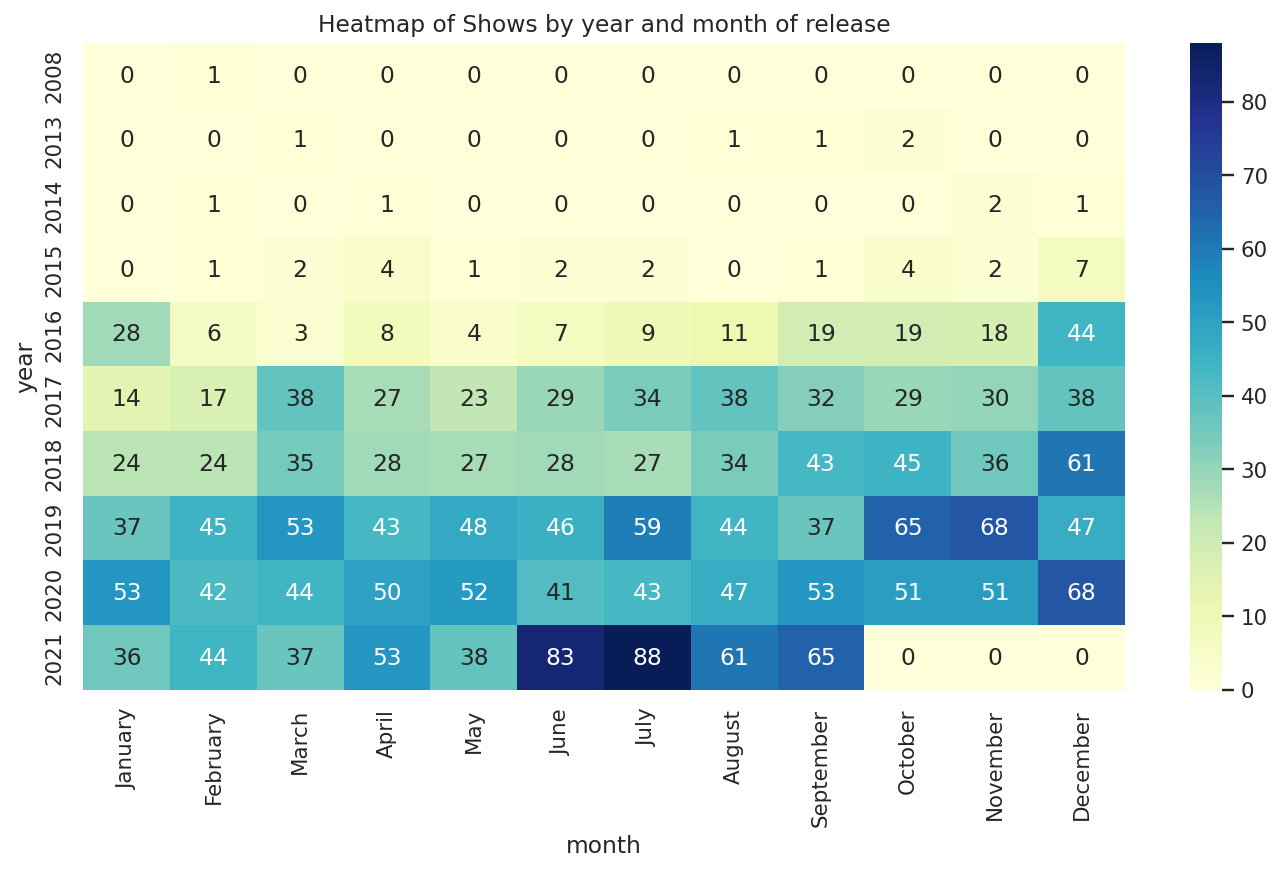

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = netflix_shows_date.pivot_table(index='year', columns='month', aggfunc='size', fill_value=0)

# Months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[month_order]

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Shows by year and month of release')
plt.show()


A more detailed look at this shows that what seemed to be a decline in 2021 is actually caused by the dataset being collected up until september 2021. We can assume that given the months leading up to the cutoff, 2021 would have possibly seen the most shows released of any year in the dataset.